In [1]:
# importing nececcry libraries
import numpy as np
import pandas as pd

In [2]:
# laoding dataset 
claim_prediction= pd.read_csv('claim_prediction.csv')
claim_prediction

,EADDC,EAFXA,FDDBC,AFDDA,AXCXA,EXCCE,FBXFC,DFFEC,CEXAE,BBADX,CLAIM
0,-0.193513,0.021062,-0.870351,4.314903,-4.260162,-1.259531,0.175603,-0.942903,2.333260,4.678712,0
1,2.667844,-3.195978,2.718651,-0.885312,2.964261,2.161336,2.008505,-0.296360,-0.610780,-2.545978,1
2,2.280602,0.048539,-2.179863,-0.380866,-1.212960,2.097278,5.131315,-1.250050,2.362880,2.207307,0
3,0.592376,-1.590548,2.329976,-1.416489,1.743390,3.040990,2.371740,-0.190549,0.890761,-2.671923,0
4,1.236896,-0.656180,-0.381064,-2.332379,0.660684,2.055621,0.478162,-0.269513,2.614886,-3.655301,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.335387,-0.002498,-1.408110,0.165536,1.823881,-1.854583,-2.988482,4.724027,-3.539125,-2.042808,1
9996,-3.402228,-0.512133,0.333368,0.440717,-4.619738,1.600502,-2.607152,-2.944162,-0.748114,0.706500,0
9997,-4.360472,-1.574251,0.017482,2.229508,0.397852,2.244527,-0.521251,0.220012,-1.724677,2.508082,1
9998,1.524260,-0.948040,-0.746293,2.532038,-2.383154,-3.038132,4.939401,-2.274399,3.431807,1.361872,1


In [3]:
claim_prediction.isnull().sum()

EADDC    0
EAFXA    0
FDDBC    0
AFDDA    0
AXCXA    0
EXCCE    0
FBXFC    0
DFFEC    0
CEXAE    0
BBADX    0
CLAIM    0
dtype: int64

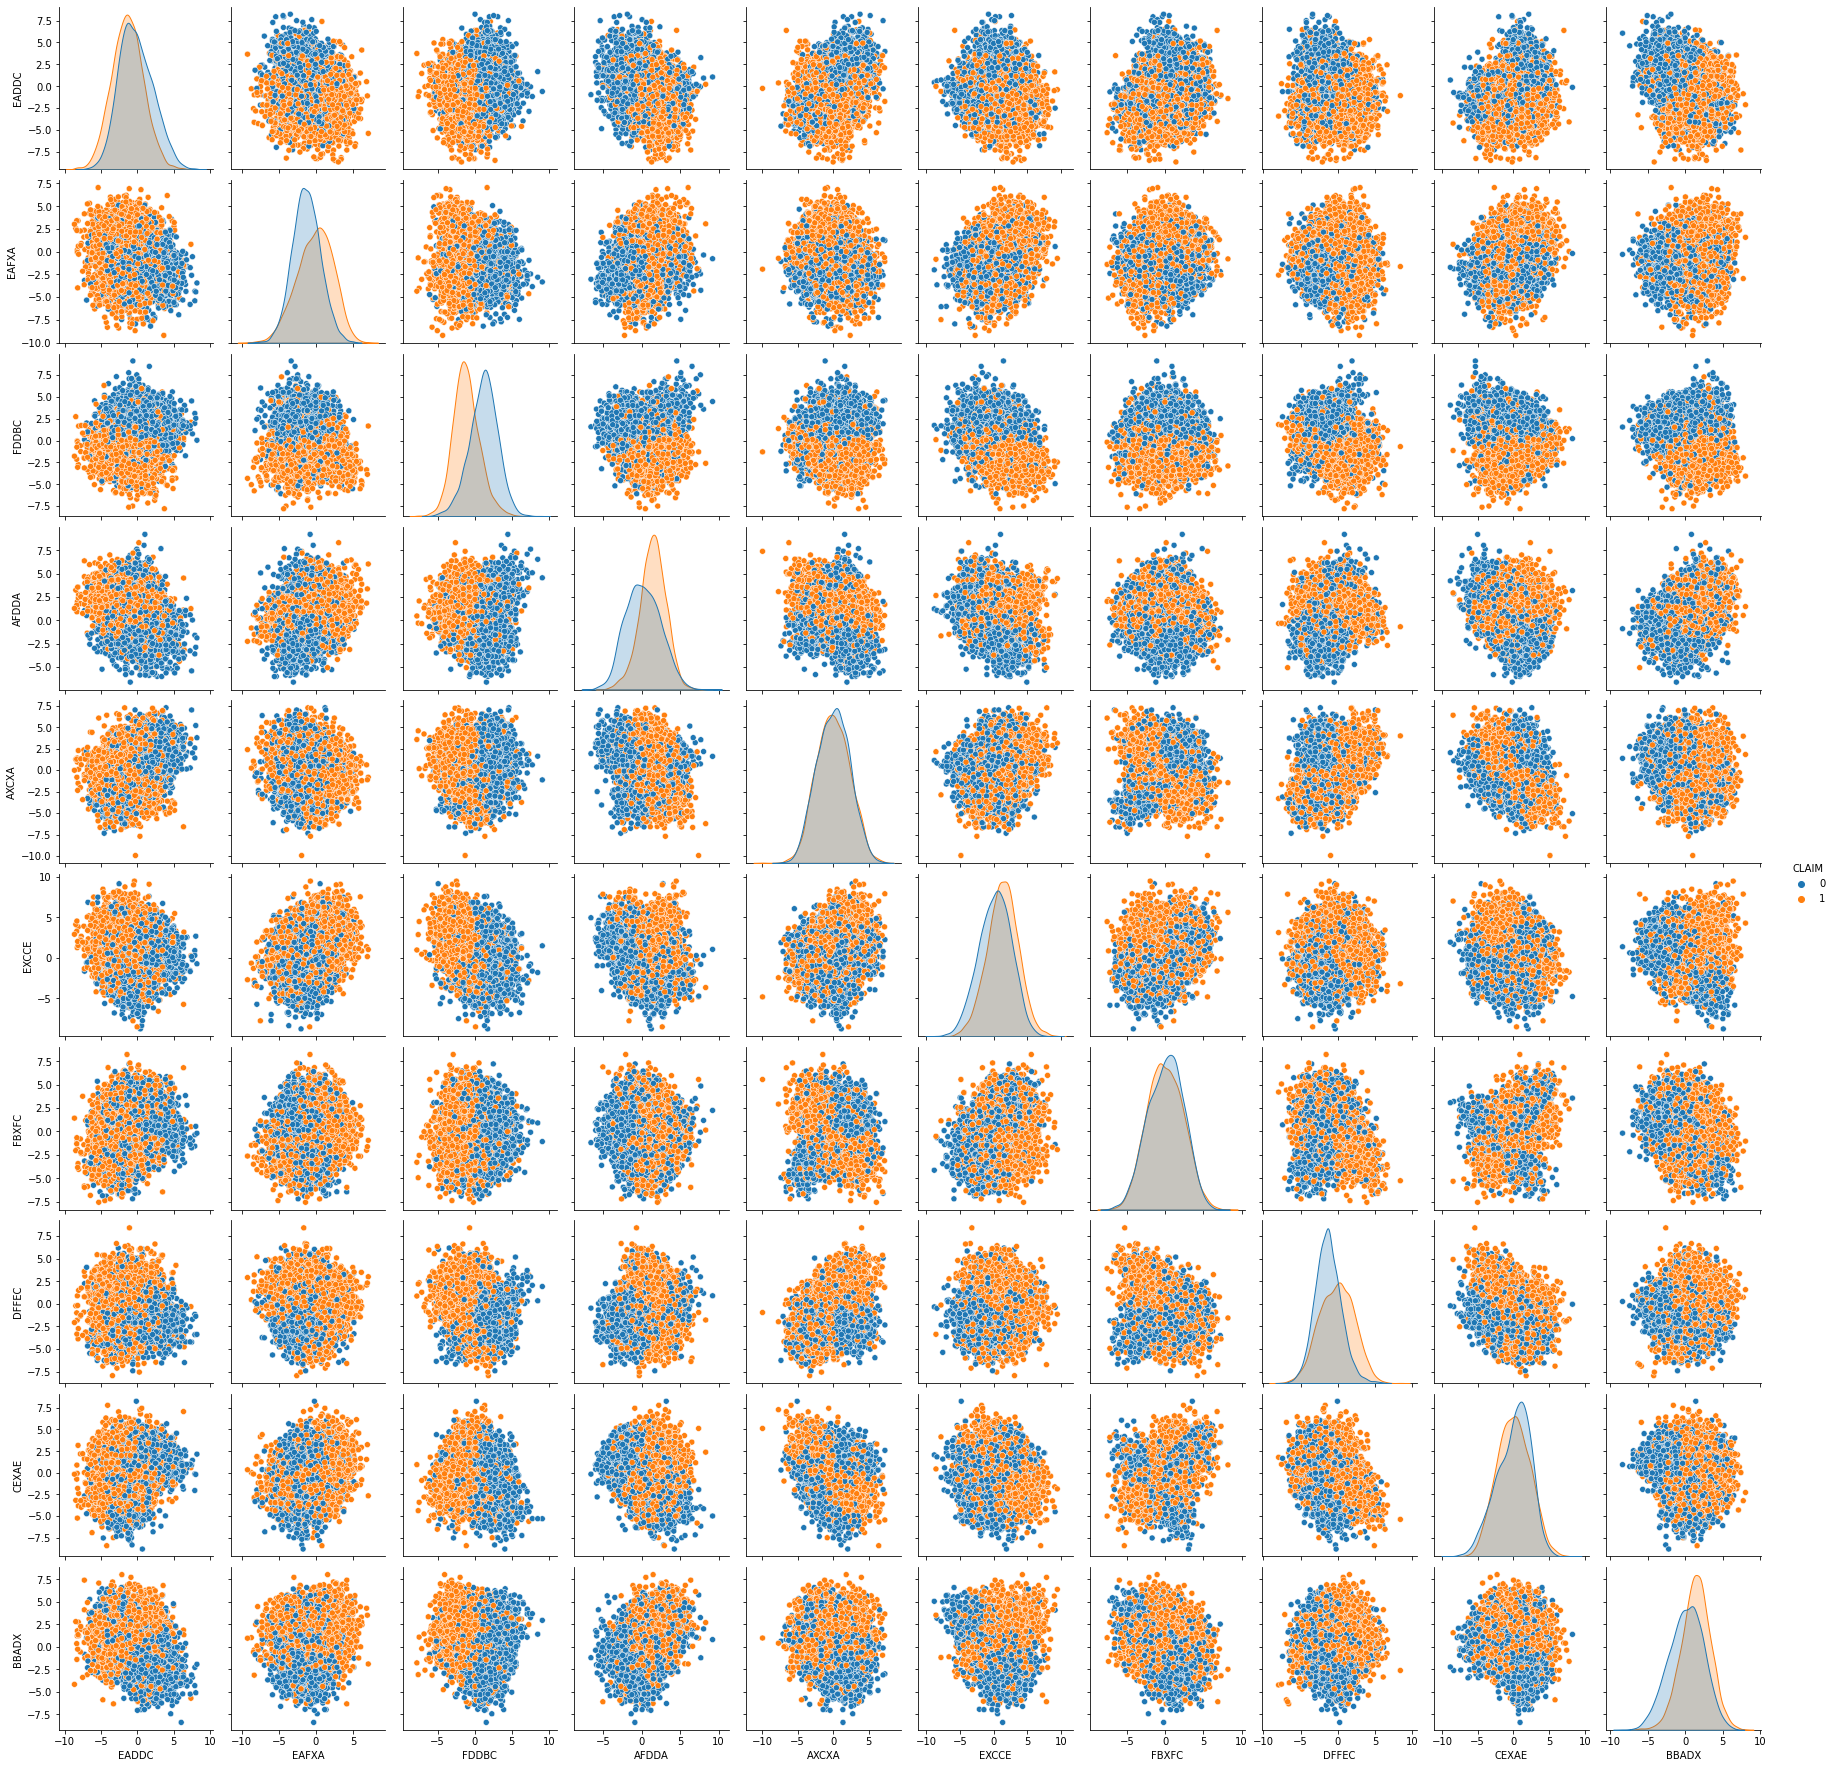

In [4]:
# To understand which machine leaning algorithm need to apply for the given query pairplot is used.
import seaborn as sns
sns.pairplot(claim_prediction, hue='CLAIM')

As per given senario of visualization its clearly showing that we can use Decision Tree, Random Forest, XGboost, KNN or other non linear machine learning algorithm, beacuse in given pairplot its clearly showing that data points are overlapping and its a classification problem.

## Standardize the variables

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scalar = StandardScaler()

In [7]:
scalar.fit(claim_prediction.drop('CLAIM', axis=1))

StandardScaler()

In [8]:
scaled_features = scalar.transform(claim_prediction.drop('CLAIM', axis=1))

In [9]:
claim_prediction_feat = pd.DataFrame(scaled_features, columns=claim_prediction.columns[:-1])
claim_prediction_feat

,EADDC,EAFXA,FDDBC,AFDDA,AXCXA,EXCCE,FBXFC,DFFEC,CEXAE,BBADX
0,0.248856,0.341668,-0.400575,1.694357,-1.834788,-0.824357,0.063496,-0.088605,1.007281,1.763649
1,1.466872,-1.093433,1.240062,-0.787076,1.304144,0.580876,0.850200,0.215629,-0.257082,-1.458946
2,1.302031,0.353926,-0.999190,-0.546365,-0.510812,0.554562,2.190550,-0.233135,1.020001,0.661271
3,0.583391,-0.377261,1.062387,-1.040542,0.773689,0.942222,1.006106,0.265419,0.387778,-1.515125
4,0.857749,0.039555,-0.176908,-1.477585,0.303265,0.537450,0.193358,0.228262,1.128229,-1.953763
...,...,...,...,...,...,...,...,...,...,...
9995,-0.662893,0.331158,-0.646400,-0.285633,0.808661,-1.068794,-1.294570,2.577997,-1.514704,-1.234506
9996,-1.117024,0.103813,0.149680,-0.154323,-1.991019,0.350495,-1.130899,-1.030307,-0.316062,-0.008169
9997,-1.524927,-0.369991,0.005279,0.699251,0.189068,0.615049,-0.235603,0.458610,-0.735462,0.795432
9998,0.980073,-0.090642,-0.343864,0.843612,-1.019249,-1.554976,2.108178,-0.715147,1.479069,0.284162


## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_features, claim_prediction['CLAIM'], test_size=0.30)

## Using KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
pred = knn.predict(x_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
print(confusion_matrix(y_test, pred))

[[1192  302]
 [ 300 1206]]


In [17]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1494
           1       0.80      0.80      0.80      1506

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



In [18]:
print(accuracy_score(y_test, pred))

0.7993333333333333


Finding the k-value or neighbors for building and predicting model performance

In [19]:
error_rate=[]

#will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error rate')

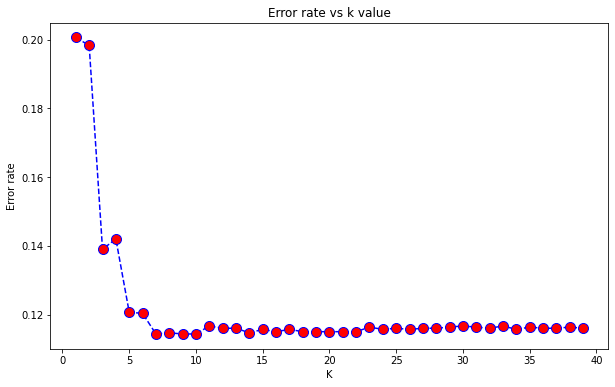

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red',
        markersize=10)
plt.title('Error rate vs k value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train, y_train)
pred= knn.predict(x_test)

print('With k=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

With k=1


[[1192  302]
 [ 300 1206]]


              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1494
           1       0.80      0.80      0.80      1506

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



In [24]:
# Now with K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(x_train, y_train)
pred= knn.predict(x_test)

print('With k=23')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

With k=23


[[1311  183]
 [ 166 1340]]


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1494
           1       0.88      0.89      0.88      1506

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



In [26]:
print(accuracy_score(y_test, pred))

0.8836666666666667
